# Proyección de rendimientos - Método Montecarlo

Un despacho de consultores financieros ha seleccionado seis posibles empresas en las cuales invertir; sin embargo, sólo buscan invertir en aquellas cuya proyección a dos años tenga más del 50% de probabilidad de superar el 15% de rendimiento.

In [28]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
names = ["COKE", "BIMBOA.MX", "GRUMAB.MX", "TWTR", "ALSEA.MX", "AEROMEX.MX"]
start = "2018-03-01"
end   = "2022-03-01"

def getClose(name, start, end) :
    return web.DataReader(name, "yahoo", start, end)["Adj Close"]

data = getClose(names, start, end)
data.head()

Symbols,COKE,BIMBOA.MX,GRUMAB.MX,TWTR,ALSEA.MX,AEROMEX.MX
Date,,,,,,
2018-03-01,182.549500,41.586456,200.129715,32.240002,63.262363,28.270000
2018-03-02,188.148712,40.605293,207.007767,33.000000,62.995392,28.209999
2018-03-05,183.031677,40.312824,204.648315,34.580002,63.381016,28.110001
2018-03-06,185.767334,40.076965,203.372910,34.430000,63.212925,28.000000
2018-03-07,182.352722,38.775032,204.520721,35.759998,63.282139,27.799999


<AxesSubplot:xlabel='Date'>

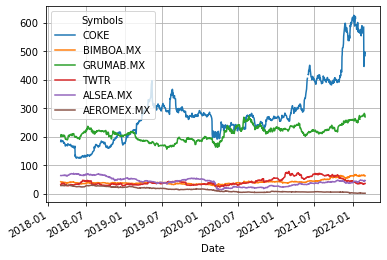

In [30]:
data.plot(grid=True)

In [31]:
R = ((data - data.shift())/data.shift()).dropna()
R.describe()

Symbols,COKE,BIMBOA.MX,GRUMAB.MX,TWTR,ALSEA.MX,AEROMEX.MX
count,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000
mean,0.001209,0.000531,0.000463,0.000877,0.000237,-0.001586
std,0.026242,0.020995,0.015911,0.032683,0.024272,0.048226
min,-0.234699,-0.117910,-0.075407,-0.211139,-0.227826,-0.523035
25%,-0.010747,-0.011139,-0.007477,-0.013876,-0.011714,-0.016137
50%,0.001107,0.000268,0.000205,0.001033,0.000000,-0.001901
75%,0.012958,0.010771,0.008137,0.015500,0.010095,0.010648
max,0.178584,0.140780,0.093033,0.156441,0.147125,0.568966


In [32]:
media_CO = R["COKE"].mean()
std_CO = R["COKE"].std()

media_BIM = R["BIMBOA.MX"].mean()
std_BIM = R["BIMBOA.MX"].std()

media_GRUMA = R["GRUMAB.MX"].mean()
std_GRUMA = R["GRUMAB.MX"].std()

media_TW = R["TWTR"].mean()
std_TW = R["TWTR"].std()

media_ALS = R["ALSEA.MX"].mean()
std_ALS = R["ALSEA.MX"].std()

media_AERO = R["AEROMEX.MX"].mean()
std_AERO = R["AEROMEX.MX"].std()

In [33]:
def simR(names, means, stds, start, dias, N) :
    sims = {}
    fechas = pd.date_range(start, periods = dias)
    for name, mean, std in zip(names, means, stds) :
        R_sim = np.random.normal(mean, std, size = (dias, N))
        sims[name] = pd.DataFrame(data=R_sim, index = fechas)
    return sims

names = ["COKE", "BIMBOA.MX", "GRUMAB.MX", "TWTR", "ALSEA.MX", "AEROMEX.MX"]
means = [media_CO, media_BIM, media_GRUMA, media_TW, media_ALS, media_AERO]
stds =  [std_CO,   std_BIM, std_GRUMA, std_TW, std_ALS, std_AERO]

sims = simR(names, means, stds, "2022-03-01", 730, 10000)

In [34]:
sims = simR(names, means, stds, "2022-03-01", 730, 10000)

sims["COKE"] = (sims["COKE"] + 1).cumprod()*data["COKE"].iloc[-1]
sims["BIMBOA.MX"] = (sims["BIMBOA.MX"] + 1).cumprod()*data["BIMBOA.MX"].iloc[-1]
sims["GRUMAB.MX"] = (sims["GRUMAB.MX"] + 1).cumprod()*data["GRUMAB.MX"].iloc[-1]
sims["TWTR"] = (sims["TWTR"] + 1).cumprod()*data["TWTR"].iloc[-1]
sims["ALSEA.MX"] = (sims["ALSEA.MX"] + 1).cumprod()*data["ALSEA.MX"].iloc[-1]
sims["AEROMEX.MX"] = (sims["AEROMEX.MX"] + 1).cumprod()*data["AEROMEX.MX"].iloc[-1]

In [35]:
valor_deseado_CO = data["COKE"].iloc[-1]*1.15
valor_deseado_BIM = data["BIMBOA.MX"].iloc[-1]*1.15
valor_deseado_GRUMA = data["GRUMAB.MX"].iloc[-1]*1.15
valor_deseado_TW = data["TWTR"].iloc[-1]*1.15
valor_deseado_ALS = data["ALSEA.MX"].iloc[-1]*1.15
valor_deseado_AERO = data["AEROMEX.MX"].iloc[-1]*1.15

B_CO = sims["COKE"] >= valor_deseado_CO
B_BIM = sims["BIMBOA.MX"] >= valor_deseado_BIM
B_GRUMA = sims["GRUMAB.MX"] >= valor_deseado_GRUMA
B_TW = sims["TWTR"] >= valor_deseado_TW
B_ALS = sims["ALSEA.MX"] >= valor_deseado_ALS
B_AERO = sims["AEROMEX.MX"] >= valor_deseado_AERO

<AxesSubplot:>

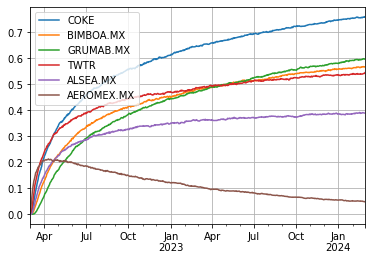

In [36]:
P_CO = B_CO.mean(axis = 1)
P_CO.columns = ["COKE"]

P_BIM = B_BIM.mean(axis = 1)
P_BIM.columns = ["BIMBOA.MX"]

P_GRUMA = B_GRUMA.mean(axis = 1)
P_GRUMA.columns = ["GRUMAB.MX"]

P_TW = B_TW.mean(axis = 1)
P_TW.columns = ["TWTR"]

P_ALS = B_ALS.mean(axis = 1)
P_ALS.columns = ["ALSEA.MX"]

P_AERO = B_AERO.mean(axis = 1)
P_AERO.columns = ["AEROMEX.MX"]

data2 = pd.DataFrame(index=pd.date_range("2022-03-01", 730), columns=["COKE", "BIMBOA.MX", "GRUMAB.MX", "TWTR", "ALSEA.MX", "AEROMEX.MX"])

data2["COKE"] = P_CO
data2["BIMBOA.MX"] = P_BIM
data2["GRUMAB.MX"] = P_GRUMA
data2["TWTR"] = P_TW
data2["ALSEA.MX"] = P_ALS
data2["AEROMEX.MX"] = P_AERO

data2.plot(grid=True)